In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

d:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
import pandas as pd

df = pd.read_csv("./dataset/Crystal_structure.csv")
df

,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-5.083429,0.942809,4.126280,0.435714
2,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-5.366857,0.928944,4.072890,0.457143
3,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-5.163714,0.957094,4.201732,0.414286
4,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,2,4,1.14,0.95,0.61,1.10,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,YbVO3,Yb,V,True,orthorhombic,2,4,1.14,0.95,0.58,1.10,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,YbWO3,Yb,W,False,orthorhombic,2,4,1.14,0.95,0.66,1.10,2.36,2.519261,1.745600,-5.215714,0.871870,4.441924,0.471429
673,YbZrO3,Yb,Zr,False,orthorhombic,2,4,1.14,0.95,0.72,1.10,1.33,2.519261,2.043778,-5.791714,0.847194,4.835508,0.514286


In [3]:
df = df.drop(columns=['Compound', 'A', 'B', 'In literature'])
df

,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-5.083429,0.942809,4.126280,0.435714
2,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-5.366857,0.928944,4.072890,0.457143
3,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-5.163714,0.957094,4.201732,0.414286
4,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,orthorhombic,2,4,1.14,0.95,0.61,1.10,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,orthorhombic,2,4,1.14,0.95,0.58,1.10,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,orthorhombic,2,4,1.14,0.95,0.66,1.10,2.36,2.519261,1.745600,-5.215714,0.871870,4.441924,0.471429
673,orthorhombic,2,4,1.14,0.95,0.72,1.10,1.33,2.519261,2.043778,-5.791714,0.847194,4.835508,0.514286


In [4]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

# np.random.seed(0)
X = df.drop(labels=["Lowest distortion"], axis=1)
# reindex
cols = X.columns.tolist()


In [5]:
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")

X = pd.DataFrame(X, columns=cols)

X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]

X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.95,0.76,NaN,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.95,0.61,1.93,2.16,NaN,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.95,0.64,NaN,1.60,2.761453,1.955055,NaN,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.95,0.58,1.93,1.90,NaN,1.987971,-5.163714,0.957094,4.201732,NaN
4,1.0,5.0,1.28,0.95,0.60,1.93,2.05,NaN,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.95,0.61,NaN,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.95,0.58,1.10,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.95,0.66,1.10,2.36,NaN,1.745600,-5.215714,0.871870,4.441924,NaN
673,2.0,4.0,1.14,0.95,0.72,1.10,1.33,NaN,2.043778,-5.791714,0.847194,4.835508,NaN


In [6]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  0.08390231440199816


,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.9500,0.76,1.8981,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.9500,0.61,1.9300,2.16,2.750663,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.9500,0.64,1.6767,1.60,2.761453,1.955055,-5.946714,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.9500,0.58,1.9300,1.90,2.746425,1.987971,-5.163714,0.957094,4.201732,0.414286
4,1.0,5.0,1.28,0.9500,0.60,1.9300,2.05,2.746425,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.9500,0.61,1.1040,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.9500,0.58,1.1000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.9500,0.66,1.1000,2.36,2.522088,1.745600,-5.215714,0.871870,4.441924,0.471429
673,2.0,4.0,1.14,0.9500,0.72,1.1000,1.33,2.519577,2.043778,-5.791714,0.847194,4.835508,0.514286


In [7]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  0.14357434647757003


,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.950000,0.76,1.932840,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.950000,0.61,1.930000,2.16,2.672226,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.950000,0.64,1.758548,1.60,2.761453,1.955055,-5.694095,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.950000,0.58,1.930000,1.90,2.663839,1.987971,-5.163714,0.957094,4.201732,0.414417
4,1.0,5.0,1.28,0.950000,0.60,1.930000,2.05,2.668067,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.950000,0.61,1.114601,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.950000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.950000,0.66,1.100000,2.36,2.526268,1.745600,-5.215714,0.871870,4.441924,0.471579
673,2.0,4.0,1.14,0.950000,0.72,1.100000,1.33,2.523275,2.043778,-5.791714,0.847194,4.835508,0.514197


In [8]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  0.17353147453743797


,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.950000,0.76,1.484192,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.950000,0.61,1.930000,2.16,2.593039,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.950000,0.64,1.487944,1.60,2.761453,1.955055,-5.839835,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.950000,0.58,1.930000,1.90,2.588974,1.987971,-5.163714,0.957094,4.201732,0.446598
4,1.0,5.0,1.28,0.950000,0.60,1.930000,2.05,2.593672,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.950000,0.61,1.354873,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.950000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.950000,0.66,1.100000,2.36,2.570357,1.745600,-5.215714,0.871870,4.441924,0.464477
673,2.0,4.0,1.14,0.950000,0.72,1.100000,1.33,2.579968,2.043778,-5.791714,0.847194,4.835508,0.515534


In [9]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  0.25462527521553496


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,5.0,1.28,0.950000,0.76,1.003795,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.950000,0.61,1.930000,2.16,2.553842,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.950000,0.64,1.341806,1.60,2.761453,1.955055,-6.025400,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.950000,0.58,1.930000,1.90,2.583791,1.987971,-5.163714,0.957094,4.201732,0.437390
4,1.0,5.0,1.28,0.950000,0.60,1.930000,2.05,2.559867,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.950000,0.61,1.460492,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.950000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.950000,0.66,1.100000,2.36,2.571828,1.745600,-5.215714,0.871870,4.441924,0.451035
673,2.0,4.0,1.14,0.950000,0.72,1.100000,1.33,2.567773,2.043778,-5.791714,0.847194,4.835508,0.536161


In [10]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.950000,0.76,1.003795,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.950000,0.61,1.930000,2.16,2.553842,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.950000,0.64,1.341806,1.60,2.761453,1.955055,-6.025400,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.950000,0.58,1.930000,1.90,2.583791,1.987971,-5.163714,0.957094,4.201732,0.437390
4,1.0,5.0,1.28,0.950000,0.60,1.930000,2.05,2.559867,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.950000,0.61,1.460492,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.950000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.950000,0.66,1.100000,2.36,2.571828,1.745600,-5.215714,0.871870,4.441924,0.451035
673,2.0,4.0,1.14,0.950000,0.72,1.100000,1.33,2.567773,2.043778,-5.791714,0.847194,4.835508,0.536161


In [11]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  0.2368405360430007


In [12]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.950000,0.76,1.808707,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.950000,0.61,1.930000,2.16,2.723397,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.950000,0.64,1.438988,1.60,2.761453,1.955055,-5.839568,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.950000,0.58,1.930000,1.90,2.682139,1.987971,-5.163714,0.957094,4.201732,0.464609
4,1.0,5.0,1.28,0.950000,0.60,1.930000,2.05,2.693697,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.950000,0.61,1.204281,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.950000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.950000,0.66,1.100000,2.36,2.514593,1.745600,-5.215714,0.871870,4.441924,0.473349
673,2.0,4.0,1.14,0.950000,0.72,1.100000,1.33,2.545001,2.043778,-5.791714,0.847194,4.835508,0.529914


In [13]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  0.5249828955291735


,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1.0,5.0,1.28,0.95000,0.76,1.314591,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,1.0,5.0,1.28,0.95000,0.61,1.930000,2.16,2.602966,1.789300,-5.083429,0.942809,4.126280,0.435714
2,1.0,5.0,1.28,0.95000,0.64,1.314591,1.60,2.761453,1.955055,-5.827663,0.928944,4.072890,0.457143
3,1.0,5.0,1.28,0.95000,0.58,1.930000,1.90,2.602966,1.987971,-5.163714,0.957094,4.201732,0.490816
4,1.0,5.0,1.28,0.95000,0.60,1.930000,2.05,2.602966,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,2.0,4.0,1.14,0.95000,0.61,1.314591,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,2.0,4.0,1.14,0.95000,0.58,1.100000,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,2.0,4.0,1.14,0.95000,0.66,1.100000,2.36,2.602966,1.745600,-5.215714,0.871870,4.441924,0.490816
673,2.0,4.0,1.14,0.95000,0.72,1.100000,1.33,2.602966,2.043778,-5.791714,0.847194,4.835508,0.490816


In [14]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['v(A)', 'v(B)', 'r(AVI)(Å)', 'EN(A)', 'l(A-O)(Å)', 'ΔENR', 'μ']

In [15]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

7      1.0
11     2.0
17     2.0
18     2.0
19     2.0
      ... 
617    3.0
619    3.0
626    3.0
645    3.0
662    2.0
Name: v(A), Length: 65, dtype: float64

et: v(A) score_std: 0.045831824354948404, score_2std: 0.30890284919499367, score_3std: 0.0
hyper: v(A) score_std: 0.25843395444227935, score_2std: 0.7374806271814995, score_3std: 0.00025854842195451846
missforest: v(A) score_std: 0.12136168083999951, score_2std: 0.45510219514117795, score_3std: 0.5908288993929244
gain: v(A) score_std: 0.2991222078723904, score_2std: 0.9329870689956432, score_3std: 0.6740429727597084
sinkhorn: v(A) score_std: 0.05666121238021468, score_2std: 0.42996252334460283, score_3std: 0.009356391951374268
mean: v(A) score_std: 0.6578448416419669, score_2std: 1.938341244526506, score_3std: 2.2007071539373286
et: v(B) score_std: 0.05999493330563244, score_2std: 0.38675439907724823, score_3std: 0.0
hyper: v(B) score_std: 0.15551649710122487, score_2std: 0.09958951187658559, score_3std: 0.008996564046381782
missforest: v(B) score_std: 0.12510455663139833, score_2std: 0.525745543713362, score_3std: 0.6206918875637186
gain: v(B) score_std: 0.21607033451226584, score_2st

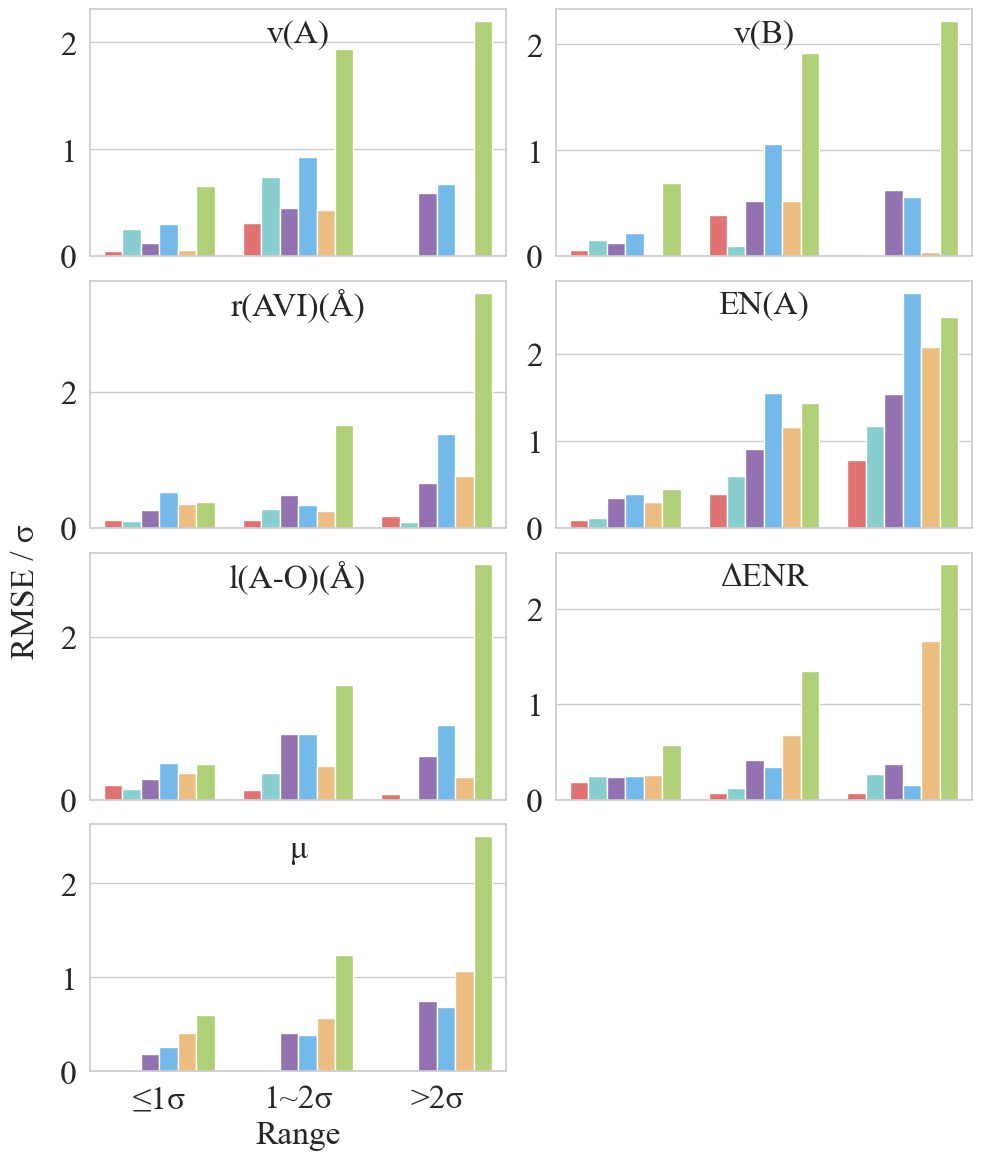

In [16]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

    # print("----------------------------------------------")
    # print(X[col].describe())
    # print("Skewness: %f" % skew(X[col]))
    # print("Kurtosis: %f" % kurtosis(X[col]))
    # print("*" * 50)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])
# add figure title
# fig.suptitle("RMSE", fontsize=24)
# set legend
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.525, 0), fontsize=24, ncol=4,
#            handletextpad=0.4, columnspacing=0.4, labelspacing=0.5, frameon=False)
# 添加左侧的y轴标签

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-crystal.xlsx", index=False)